In [1]:
!pip install holidays

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 820.7/820.7 kB 13.7 MB/s eta 0:00:00


In [2]:
!pip install prophet==1.1.6

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 101.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 6.5 MB/s eta 0:00:00


In [3]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 89.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 15.6 MB/s eta 0:00:00


In [4]:
!pip install folium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.9/110.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 5.6 MB/s eta 0:00:00


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import holidays
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import folium
from folium.plugins import HeatMap
import plotly.express as px

In [6]:
df = pd.read_csv('/content/drive/MyDrive/GDG/Research Paper/Datasets/Clean_LA_Crime.csv')

In [7]:
df['DateTime'] = pd.to_datetime(df['DATE OCC'].astype(str) + ' ' + df['TIME OCC'].astype(str))

In [8]:
df_prophet = df[['DateTime', 'Crm Cd Desc']].groupby(['DateTime']).size().reset_index(name='crime_count')
df_prophet.columns = ['ds', 'y']

# Combine 24 Hours

In [ ]:
prophet_model = Prophet()
prophet_model.fit(df_prophet)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpzfa1dn0w/_3cz9a3g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzfa1dn0w/c8ujjy3d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12664', 'data', 'file=/tmp/tmpzfa1dn0w/_3cz9a3g.json', 'init=/tmp/tmpzfa1dn0w/c8ujjy3d.json', 'output', 'file=/tmp/tmpzfa1dn0w/prophet_model2jt3e1w7/prophet_model-20250227153057.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:30:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:33:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = prophet_model.make_future_dataframe(periods=24, freq='H')
forecast_prophet = prophet_model.predict(future)

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


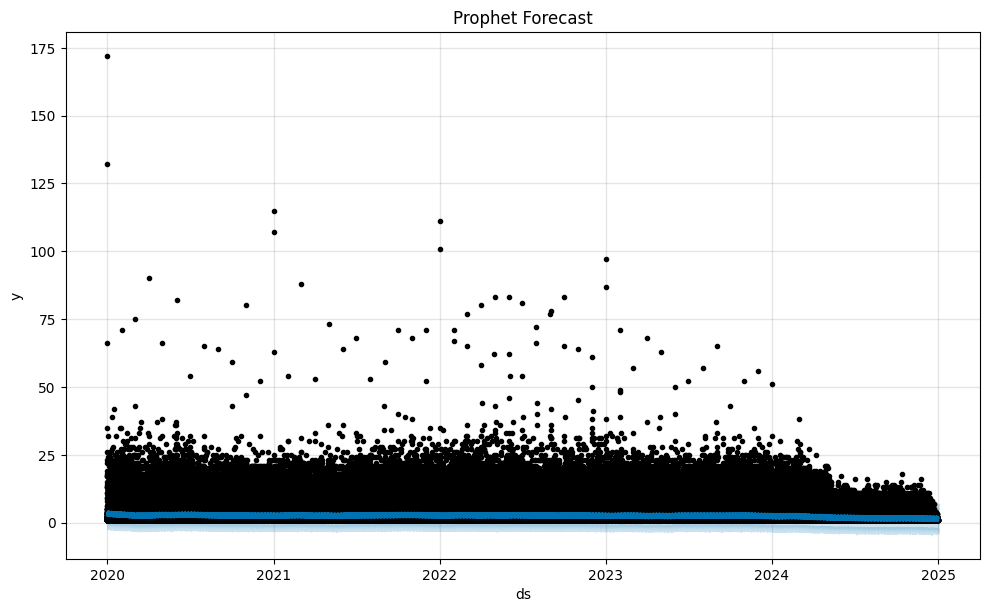

In [ ]:
fig = prophet_model.plot(forecast_prophet)
plt.title("Prophet Forecast")
plt.show()

In [ ]:
prophet_forecast = forecast_prophet.tail(24)['yhat']

In [ ]:
df_resampled = df.resample('H', on='DateTime').size()

<ipython-input-16-3eb0d8b79523>:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled = df.resample('H', on='DateTime').size()


In [ ]:
train_data = df_resampled[:-24]
test_data = df_resampled[-24:]

In [ ]:
train_data_with_prophet = train_data.copy()
train_data_with_prophet = train_data_with_prophet.reset_index(drop=True)
train_data_with_prophet = train_data_with_prophet.to_frame(name='y')

In [ ]:
train_data_with_prophet['prophet_forecast'] = np.concatenate([np.zeros(len(train_data)-len(prophet_forecast)), prophet_forecast])

In [ ]:
arima_model = ARIMA(train_data_with_prophet['y'], exog=train_data_with_prophet['prophet_forecast'], order=(5, 1, 0))  # Example ARIMA order
arima_model_fit = arima_model.fit()

In [ ]:
forecast_arima = arima_model_fit.forecast(steps=24, exog=prophet_forecast)

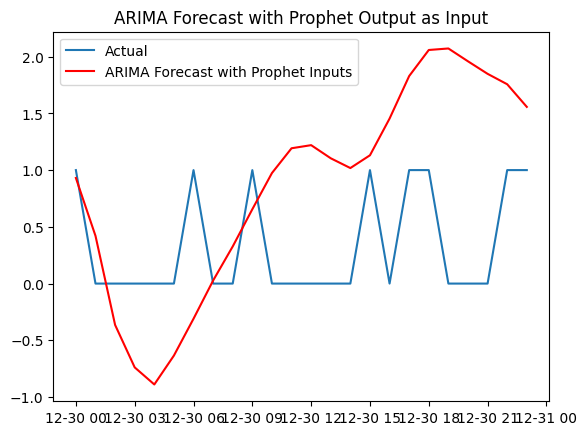

In [ ]:
plt.plot(test_data.index, test_data.values, label='Actual')
plt.plot(test_data.index, forecast_arima, label='ARIMA Forecast with Prophet Inputs', color='red')
plt.legend()
plt.title("ARIMA Forecast with Prophet Output as Input")
plt.show()

In [ ]:
mse_arima = mean_squared_error(test_data, forecast_arima)
rmse_arima = np.sqrt(mse_arima)

model_metrics = {
    'MSE': [mse_arima],
    'RMSE': [rmse_arima]
}

print(model_metrics)

{'MSE': [1.1030280776480375], 'RMSE': [1.0502514354420267]}


# Combine 1 Week

In [ ]:
prophet_model = Prophet()
prophet_model.fit(df_prophet)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpzfa1dn0w/c_cqyi0t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzfa1dn0w/2a5yjjzo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14613', 'data', 'file=/tmp/tmpzfa1dn0w/c_cqyi0t.json', 'init=/tmp/tmpzfa1dn0w/2a5yjjzo.json', 'output', 'file=/tmp/tmpzfa1dn0w/prophet_modelm4179vtl/prophet_model-20250227154119.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:41:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:43:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = prophet_model.make_future_dataframe(periods=168, freq='H')
forecast_prophet = prophet_model.predict(future)

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


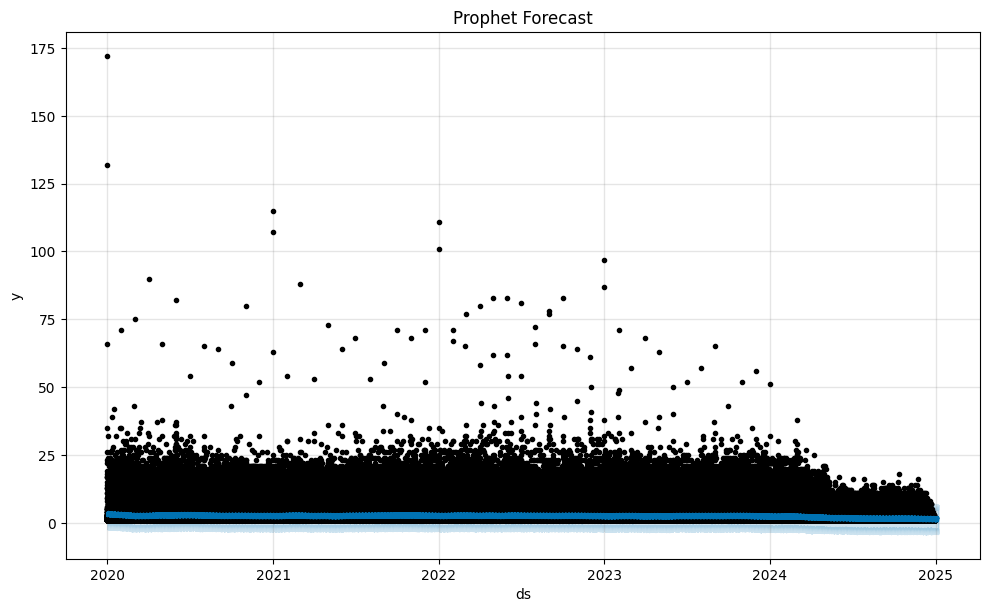

In [ ]:
fig = prophet_model.plot(forecast_prophet)
plt.title("Prophet Forecast")
plt.show()

In [ ]:
prophet_forecast = forecast_prophet.tail(168)['yhat']

In [ ]:
df_resampled = df.resample('H', on='DateTime').size()

<ipython-input-29-3eb0d8b79523>:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled = df.resample('H', on='DateTime').size()


In [ ]:
train_data = df_resampled[:-168]
test_data = df_resampled[-168:]

In [ ]:
train_data_with_prophet = train_data.copy()
train_data_with_prophet = train_data_with_prophet.reset_index(drop=True)
train_data_with_prophet = train_data_with_prophet.to_frame(name='y')

In [ ]:
train_data_with_prophet['prophet_forecast'] = np.concatenate([np.zeros(len(train_data)-len(prophet_forecast)), prophet_forecast])

In [ ]:
arima_model = ARIMA(train_data_with_prophet['y'], exog=train_data_with_prophet['prophet_forecast'], order=(5, 1, 0))  # Example ARIMA order
arima_model_fit = arima_model.fit()

In [ ]:
forecast_arima = arima_model_fit.forecast(steps=168, exog=prophet_forecast)

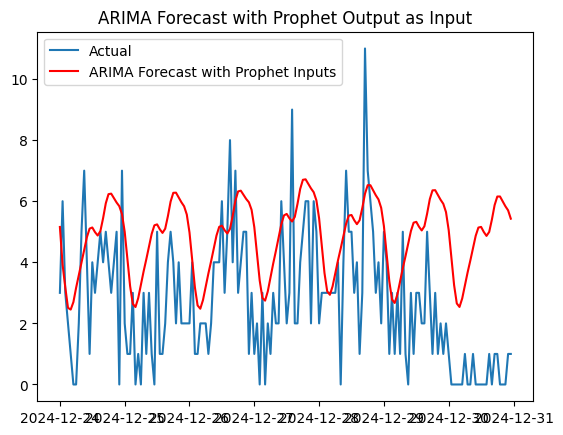

In [ ]:
plt.plot(test_data.index, test_data.values, label='Actual')
plt.plot(test_data.index, forecast_arima, label='ARIMA Forecast with Prophet Inputs', color='red')
plt.legend()
plt.title("ARIMA Forecast with Prophet Output as Input")
plt.show()

In [ ]:
mse_arima = mean_squared_error(test_data, forecast_arima)
rmse_arima = np.sqrt(mse_arima)

model_metrics = {
    'MSE': [mse_arima],
    'RMSE': [rmse_arima]
}

print(model_metrics)

{'MSE': [8.533753084660793], 'RMSE': [2.9212588184994486]}


# Combine 1 Month

In [ ]:
future = prophet_model.make_future_dataframe(periods=720, freq='H')
forecast_prophet = prophet_model.predict(future)

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


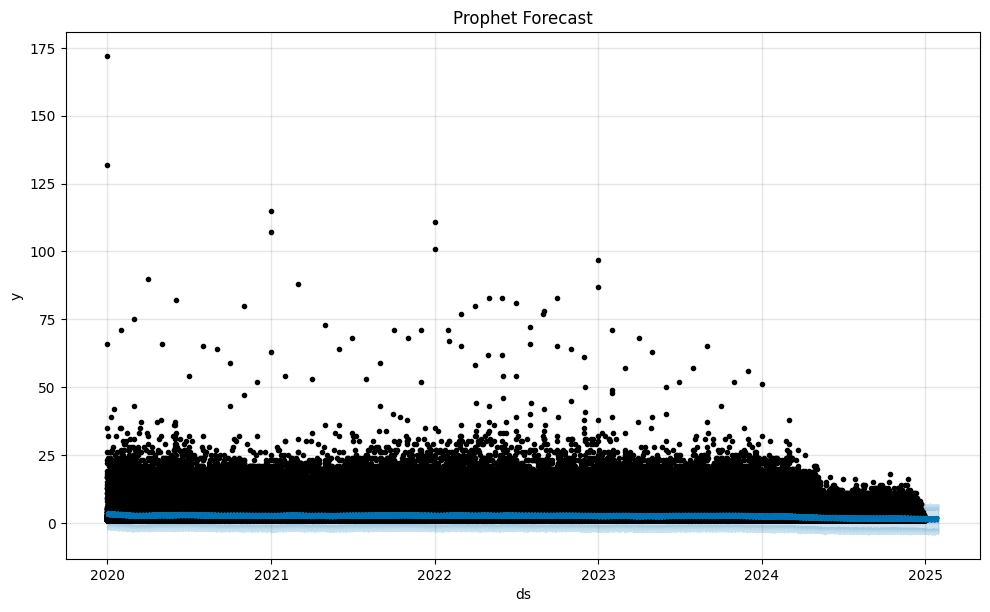

In [ ]:
fig = prophet_model.plot(forecast_prophet)
plt.title("Prophet Forecast")
plt.show()

In [ ]:
prophet_forecast = forecast_prophet.tail(720)['yhat']

In [ ]:
df_resampled = df.resample('H', on='DateTime').size()

<ipython-input-40-3eb0d8b79523>:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled = df.resample('H', on='DateTime').size()


In [ ]:
train_data = df_resampled[:-720]
test_data = df_resampled[-720:]

In [ ]:
train_data_with_prophet = train_data.copy()
train_data_with_prophet = train_data_with_prophet.reset_index(drop=True)
train_data_with_prophet = train_data_with_prophet.to_frame(name='y')

In [ ]:
train_data_with_prophet['prophet_forecast'] = np.concatenate([np.zeros(len(train_data)-len(prophet_forecast)), prophet_forecast])

In [ ]:
arima_model = ARIMA(train_data_with_prophet['y'], exog=train_data_with_prophet['prophet_forecast'], order=(5, 1, 0))  # Example ARIMA order
arima_model_fit = arima_model.fit()

In [ ]:
forecast_arima = arima_model_fit.forecast(steps=720, exog=prophet_forecast)

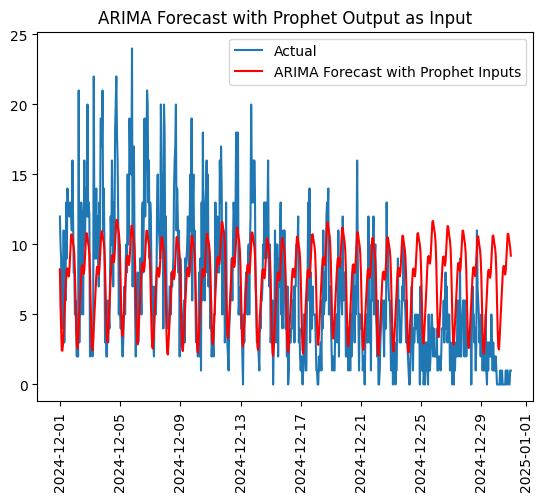

In [ ]:
plt.plot(test_data.index, test_data.values, label='Actual')
plt.plot(test_data.index, forecast_arima, label='ARIMA Forecast with Prophet Inputs', color='red')
plt.legend()
plt.title("ARIMA Forecast with Prophet Output as Input")
plt.xticks(rotation=90)
plt.show()

In [ ]:
mse_arima = mean_squared_error(test_data, forecast_arima)
rmse_arima = np.sqrt(mse_arima)

model_metrics = {
    'MSE': [mse_arima],
    'RMSE': [rmse_arima]
}

print(model_metrics)

{'MSE': [19.2120715341963], 'RMSE': [4.383157712676593]}
